# Лабораторная работа

## студент РК6-61Б Абдулаев Баттал

### Задание

Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.Например, найти значения параметров, обеспечивающие минимальную разницу между числом "хищников" и числом "жертв" на всем интервале моделирования.


Для математической модели Вольтерра - Лотки характерно равновесное состояние, когда число жертв и хищников постоянно. Эту систему нельзя считать грубой: любое изменение правой части уравнений приведёт к качественному изменению её динамического поведения. Среди особенностей модели Вольтерра - Лотки можно выделить так называемые стационарные точки. Они являются решениями самой системы.
dx/dt = alpha  x - beta  x * ydy/dt = delta  x  y - gamma * y 
где alpha - коэффициент роста жертв, beta - коэффициент смертности жертв,
delta - коэффициент роста хищников, gamma - коэффициент смертности хищников,
x - популяция жертв, y - популяция хищников.

Критерий устойчивости - определение того, какое состояние системы является устойчивым. 
Выбранный критерий - отношение численности травоядных к численности хищников на грани вымирания будет равно 1.3.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, fsolve
import math

In [5]:
class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

Значения коэффициентов: [2.08415462 1.8302959  1.91584538 2.1697041 ]


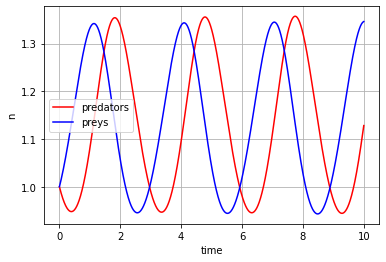

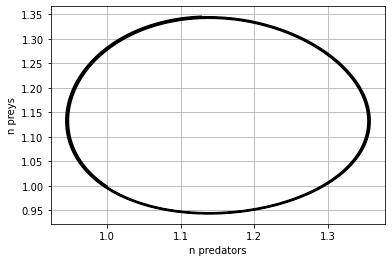

In [7]:
criter = 1.3


def compare(coefficient):
    x_0 = 1
    y_0 = 1
    alpha, beta, gamma, delta = coefficient
    x_s = gamma / delta
    y_s = alpha / beta
    const = beta * y_0 + delta * x_0 - alpha * np.log(np.abs(y_0)) - gamma * np.log(np.abs(x_0))

    def getx(x):
        return beta * y_s + delta * x - alpha * np.log(np.abs(y_s)) - gamma * np.log(np.abs(x)) - const

    def gety(y):
        return beta * y + delta * x_s - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_s)) - const

    x_min = fsolve(getx, 0.001)  # кол-во жертв на пике вымирания
    y_min = fsolve(gety, 0.001)  # кол-во хищников на пике вымирания

    return np.abs(y_min / x_min - criter)  # условие минимизации

def main():
    solution = minimize(compare, [2, 2, 2, 2])
    biome = Biome()
    biome.run(*solution.x)
    print("Значения коэффициентов:", solution.x)
    biome.plot()
    biome.plot_cycle()

main()